   Size_sqft  Bedrooms  Bathrooms   Price
0       3232         1          1  575229
1       3107         3          1  553989
2       2153         4          1  415737
3       3764         1          2  645791
4       1335         4          1  284371
Intercept: 56694.82446294767
Coefficients: [  149.03311162  9584.62748174 10306.78202348]
Training R² Score: 0.9940240372211652
Testing R² Score: 0.9932460923524717
Root Mean Squared Error (RMSE): 11179.66379227432

Feature Importance:
      Feature   Coefficient
2  Bathrooms  10306.782023
1   Bedrooms   9584.627482
0  Size_sqft    149.033112


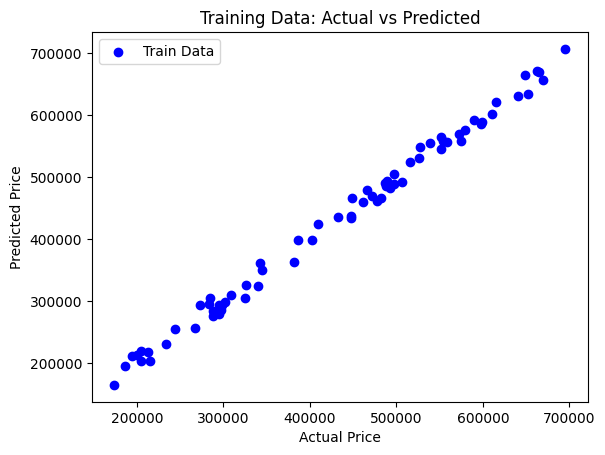

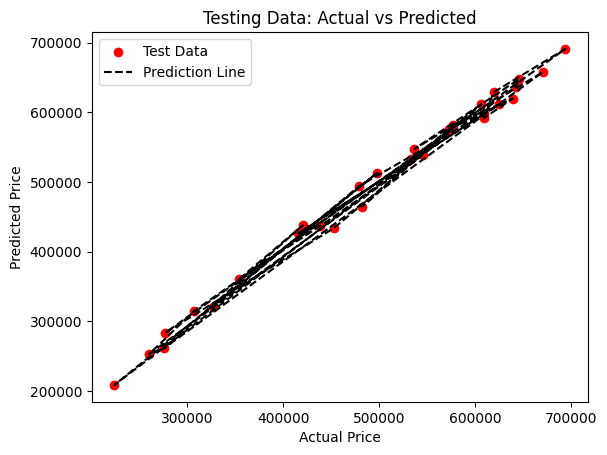

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# -----------------------------
# Load Dataset
# -----------------------------
data = pd.read_csv("house_prices.csv")
print(data.head())

# Features (X) and Target (y)
X = data.drop(columns="Price")
y = data["Price"]

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# -----------------------------
# Train Linear Regression Model
# -----------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model Parameters
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# -----------------------------
# Predictions
# -----------------------------
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# -----------------------------
# Performance Evaluation
# -----------------------------
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("Training R² Score:", train_r2)
print("Testing R² Score:", test_r2)
print("Root Mean Squared Error (RMSE):", rmse)

# -----------------------------
# Feature Importance
# -----------------------------
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:\n", feature_importance)

# -----------------------------
# Visualization
# -----------------------------
# Actual vs Predicted (Train)
plt.scatter(y_train, y_pred_train, color="blue", label="Train Data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Training Data: Actual vs Predicted")
plt.legend()
plt.show()

# Actual vs Predicted (Test)
plt.scatter(y_test, y_pred_test, color="red", label="Test Data")
plt.plot(y_test, y_pred_test, color="black", linestyle="--", label="Prediction Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing Data: Actual vs Predicted")
plt.legend()
plt.show()
